In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = list(range(5))
y = [1,3,7,13,21]

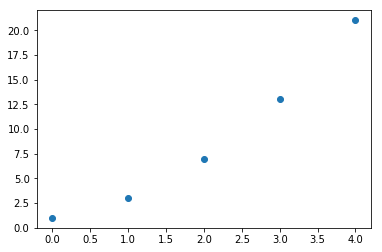

In [4]:
plt.scatter(X,y)
plt.show()

## Closed Form Solution

In [5]:
theta_0 = 0
theta_1 = 0
alpha = 0.05  #The step size
threshold = 0.1 #
magnitude = 20 # magnitude is the convergence calculator 

In [6]:
numerator = sum([X[i]*y[i] for i in range(len(X))]) - (np.sum(np.array(y)) * np.sum(np.array(X)))/len(X)
denominator = np.sum(np.array([(X[i])**2 for i in range(len(X))])) - (np.sum(np.array(X)) * np.sum(np.array(X)))/len(X)

In [7]:
theta_1 = numerator/denominator
theta_0 = np.mean(np.array([y[i] - theta_1*X[i] for i in range(len(X))]))

In [8]:
slope = theta_1
intercept = theta_0

In [9]:
prediction_closed = theta_0 + theta_1 * np.array(X)
prediction_closed

array([-1.,  4.,  9., 14., 19.])

In [35]:
y

[1, 3, 7, 13, 21]

In [10]:
print("Numerator:- %.2f\tDenominator:- %.2f\n" %(numerator, denominator))
print("Slope:- %.2f" %(numerator/denominator))

Numerator:- 50.00	Denominator:- 10.00

Slope:- 5.00


## Plot the line

In [11]:
def vizualize(X, y, pred):
    plt.plot(X,y)
    plt.plot(X, pred)


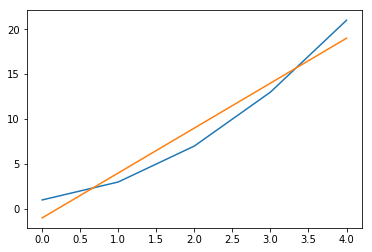

In [12]:
vizualize(X, y, prediction_closed)

In [13]:
result_df = pd.DataFrame({"Actual":y, "Predicted": prediction_closed}, columns=["Actual", "Predicted"])
result_df["Difference"] = abs(result_df["Actual"] - result_df["Predicted"])

In [15]:
result_df

,Actual,Predicted,Difference
0,1,-1.0,2.0
1,3,4.0,1.0
2,7,9.0,2.0
3,13,14.0,1.0
4,21,19.0,2.0


## Gradient Descent Algorithm

In [16]:
#Initialize the variables
theta_0 = 0
theta_1 = 0
alpha = 0.05
tolerance = 0.01

In [17]:
#Magnitude is the  Residual Sum of Squares error
magnitude = np.sqrt((np.sum([(y[i]-(theta_0 + theta_1*X[i])) for i in range(len(X))]))**2 + (np.sum([X[i]*(y[i]-(theta_0 + theta_1*X[i])) for i in range(len(X))]))**2)

In [18]:
def gradient_descent(theta_0, theta_1, alpha, threshold):
    global magnitude
    while(magnitude>tolerance):
        #run the gradient descent algorithm
        theta_0 = theta_0 - alpha*sum([(-1)*(y[i] - (theta_0 + theta_1*X[i])) for i in range(len(X))])/len(X)
        theta_1 = theta_1 - alpha*sum([(-1)*X[i]*(y[i] - (theta_0 + theta_1*X[i])) for i in range(len(X))])/len(X)
        
        error_theta_0 = (np.sum([(y[i]-(theta_0 + theta_1*X[i])) for i in range(len(X))]))**2
        error_theta_1 = (np.sum([X[i]*(y[i]-(theta_0 + theta_1*X[i])) for i in range(len(X))]))**2
        
        #Vizualize the line
        predicted_gradient = [(theta_0 + theta_1*X[i]) for i in range(len(X))]
        vizualize(X, y, predicted_gradient)
        magnitude = error_theta_0 + error_theta_1
    return(theta_0, theta_1, magnitude, predicted_gradient)

theta_0:- -0.94	theta_1:- 4.98	magnitude:- 0.01


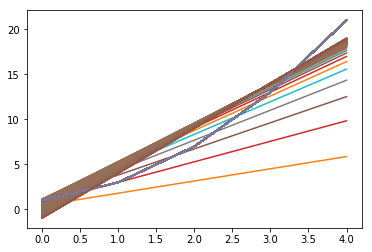

In [19]:
result = gradient_descent(theta_0, theta_1, alpha, threshold)
print("theta_0:- %.2f\ttheta_1:- %.2f\tmagnitude:- %.2f" %(result[0], result[1], result[2]))

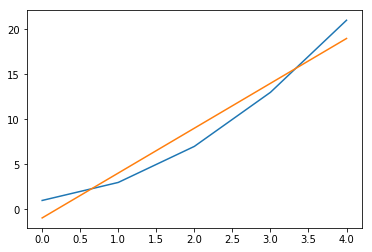

In [21]:
predicted_gradient = result[3]
#Final Line
vizualize(X, y, predicted_gradient)

## 